In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
breaches = pd.read_csv('dropped_dataframe.csv')

In [4]:
breaches.shape

(2084, 17)

In [5]:
breaches.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description,Hacking/IT Incident,Other,Unauthorized Access/Disclosure,Theft,Improper Disposal,Loss,Unknown,Name of Covered Entity clean
0,Delta Dental of Illinois,IL,Business Associate,4216.0,2019-04-17,Hacking/IT Incident,Email,Yes,Breach #19-340335 will be consolidated into Br...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Delta Dental of Illinois
1,Providence Health Plan,OR,Health Plan,651.0,2019-03-19,Theft,Laptop,Yes,An unencrypted laptop computer containing the ...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Providence Health Plan
2,ZOLL Services LLC,PA,Healthcare Provider,277319.0,2019-03-18,Hacking/IT Incident,Network Server,Yes,"Sonian, a subcontractor of the covered entity’...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,ZOLL Services
3,Pasquotank-Camden Emergency Medical Service,NC,Healthcare Provider,20420.0,2019-02-28,Hacking/IT Incident,Network Server,No,"On December 14, 2018, Pasquotank-Camden Emerge...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,PasquotankCamden Emergency Medical Service
4,AltaMed Health Services Corporation,CA,Healthcare Provider,6000.0,2019-02-15,Hacking/IT Incident,Network Server,Yes,"On December 31, 2018, ShareCare Health Data Se...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,AltaMed Health Services Corporation


In [6]:
breaches['Individuals Affected']

0         4216.0
1          651.0
2       277319.0
3        20420.0
4         6000.0
          ...   
2079      5166.0
2080      3800.0
2081       501.0
2082      1000.0
2083      1000.0
Name: Individuals Affected, Length: 2084, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

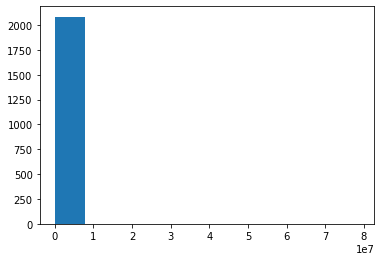

In [7]:
# Plot histogram of Individuals Affected
plt.hist(breaches['Individuals Affected'])
plt.show

In [8]:
# Remove outliers in order to fix histogram
breaches['Individuals Affected'].describe()

count    2.084000e+03
mean     6.832160e+04
std      1.740376e+06
min      0.000000e+00
25%      9.527500e+02
50%      2.100000e+03
75%      7.090750e+03
max      7.880000e+07
Name: Individuals Affected, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

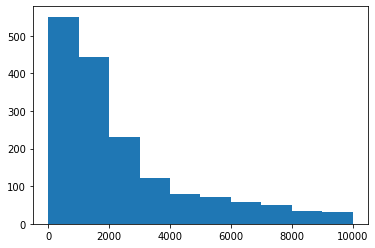

In [9]:
# If you look at the 75%, you see about 7000 individuals affected. 
# While the max is at 70 million.
# Filtering by individuals affected lower than 10000:

scaled = breaches[breaches['Individuals Affected'] < 10000]
plt.hist(scaled['Individuals Affected'], bins = 10)
plt.show

In [10]:
# Calculate mean of Individuals Affected
np.mean(scaled['Individuals Affected'])

2419.019760479042

In [11]:
# Calculate standard deviation of Individuals Affected
np.std(scaled['Individuals Affected'])

2228.195326040061

# I. T-test hypothesis test

Hypothesis test : T-test

Null hypothesis: The number of individuals affected by "Hacking/IT Incident" breach types are the same as the number of individuals affected by breach types that are not "Hacking/IT Incident" breach types.

Alternative hypothesis: The number of individuals affected by "Hacking/IT Incident" breach types are not the same as the number of individuals affected by breach types that are not "Hacking/IT Incident" breach types.

In [12]:
# Select two groups to test : individuals affected by "Hacking/IT Incident" breach types 
# and individuals affected by other breach types

# Select "Hacking/IT Incident" breach types

hacking_breach = scaled[(scaled['Hacking/IT Incident'] == 1)]
hacking_breach

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description,Hacking/IT Incident,Other,Unauthorized Access/Disclosure,Theft,Improper Disposal,Loss,Unknown,Name of Covered Entity clean
0,Delta Dental of Illinois,IL,Business Associate,4216.0,2019-04-17,Hacking/IT Incident,Email,Yes,Breach #19-340335 will be consolidated into Br...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Delta Dental of Illinois
4,AltaMed Health Services Corporation,CA,Healthcare Provider,6000.0,2019-02-15,Hacking/IT Incident,Network Server,Yes,"On December 31, 2018, ShareCare Health Data Se...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,AltaMed Health Services Corporation
12,"VIRTUAL RADIOLOGIC PROFESSIONALS, LLC",MN,Healthcare Provider,846.0,2018-12-19,Hacking/IT Incident,Other,Yes,"Virtual Radiologic Professionals, LLC, the cov...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,VIRTUAL RADIOLOGIC PROFESSIONALS
13,Tift Regional Medical Center,GA,Healthcare Provider,1045.0,2018-12-18,Hacking/IT Incident,Email,No,"Tift Regional Medical Center, the covered enti...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,Tift Regional Medical Center
18,Tandigm Health,PA,Business Associate,7376.0,2018-11-21,Hacking/IT Incident,Network Server,Yes,Due a vulnerability on the covered entity’s (C...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Tandigm Health
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,"Gary C. Spinks, DMD, PC",MD,Healthcare Provider,1000.0,2010-12-13,Hacking/IT Incident,"Desktop Computer, Network Server",No,\N,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Gary C Spinks DMD
1906,SW Seattle Orthopaedic and Sports Medicine,WA,Healthcare Provider,9493.0,2010-10-15,Hacking/IT Incident,Network Server,No,"A database web server, containing the electron...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,SW Seattle Orthopaedic Sports Medicine
1947,UNCG Speech and Hearing Center,NC,Healthcare Provider,2300.0,2010-08-09,Hacking/IT Incident,Desktop Computer,No,Computer malware was detected on the covered e...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,UNCG Speech Hearing Center
1996,"University of Louisville Research Foundation, ...",KY,Healthcare Provider,708.0,2010-06-01,Hacking/IT Incident,Network Server,No,An outside computer’s unique numerical code (I...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,University of Louisville Research Foundation ...


In [13]:
# Select all other breach types that are not "Hacking/IT Incident" breach types
other_breaches = scaled[(scaled['Hacking/IT Incident'] == 0)]
other_breaches

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description,Hacking/IT Incident,Other,Unauthorized Access/Disclosure,Theft,Improper Disposal,Loss,Unknown,Name of Covered Entity clean
1,Providence Health Plan,OR,Health Plan,651.0,2019-03-19,Theft,Laptop,Yes,An unencrypted laptop computer containing the ...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Providence Health Plan
5,"Lanier Family & Cosmetic Dentistry, P.C.",GA,Healthcare Provider,1950.0,2019-01-29,Unauthorized Access/Disclosure,Email,No,"On October 24, 2018, via a business associate ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,Lanier Family Cosmetic Dentistry
7,ABB Inc. Active Employee Group Benefit Plan,NC,Health Plan,6877.0,2019-01-18,Unauthorized Access/Disclosure,Paper/Films,Yes,"The covered entity (CE), ABB Inc. Active Emplo...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,ABB Active Employee Group Benefit Plan
8,Lebanon VA Medical Center,PA,Healthcare Provider,1002.0,2019-01-16,Unauthorized Access/Disclosure,Email,No,An employee of the covered entity (CE) inadver...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Lebanon VA Medical Center
9,Humana Inc,KY,Health Plan,684.0,2018-12-31,Theft,Paper/Films,No,"On July 3, 2018, the covered entity’s (CE) sal...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,Humana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079,"Mark D. Lurie, MD",CA,Healthcare Provider,5166.0,2009-11-20,Theft,Desktop Computer,No,A shared Computer that was used for backup was...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Mark D Lurie MD
2080,Health Services for Children with Special Need...,DC,Health Plan,3800.0,2009-11-17,Loss,Laptop,No,A laptop was lost by an employee while in tran...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Health Services for Children with Special Needs
2081,Alaska Department of Health and Social Services,AK,Healthcare Provider,501.0,2009-10-30,Theft,"Other, Other Portable Electronic Device",No,The Alaska Department of Health and Social Ser...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Alaska Department of Health Social Services
2082,"Mid America Kidney Stone Association, LLC",MO,Healthcare Provider,1000.0,2009-10-28,Theft,Network Server,No,Five desktop computers containing unencrypted ...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Mid America Kidney Stone Association


In [14]:
# Select "Individuals Affected" by "Hacking/IT Incident" breach types

hacking_breach_individuals = scaled[(scaled['Hacking/IT Incident'] == 1)]['Individuals Affected']
hacking_breach_individuals

0       4216.0
4       6000.0
12       846.0
13      1045.0
18      7376.0
         ...  
1880    1000.0
1906    9493.0
1947    2300.0
1996     708.0
2031     957.0
Name: Individuals Affected, Length: 256, dtype: float64

In [15]:
# Select "Individuals Affected" by all other breach types 

other_breaches_individuals = scaled[(scaled['Hacking/IT Incident'] == 0)]['Individuals Affected']
other_breaches_individuals

1        651.0
5       1950.0
7       6877.0
8       1002.0
9        684.0
         ...  
2079    5166.0
2080    3800.0
2081     501.0
2082    1000.0
2083    1000.0
Name: Individuals Affected, Length: 1412, dtype: float64

In [16]:
# Sample mean of "Individuals Affeceted" by "Hacking/IT Incident" breach types

hacking_breach_individuals_mean = np.mean(hacking_breach_individuals)
hacking_breach_individuals_mean       

3090.2890625

In [17]:
# Sample mean of "Individuals Affected" by all other breach types 

other_breaches_individuals_mean = np.mean(other_breaches_individuals)
other_breaches_individuals_mean

2300.346317280453

In [18]:
# Hypothesis test using scipy.stats

from scipy import stats

stats.ttest_ind(hacking_breach_individuals, other_breaches_individuals)

Ttest_indResult(statistic=5.258719174759602, pvalue=1.638223020546479e-07)

<function matplotlib.pyplot.show(*args, **kw)>

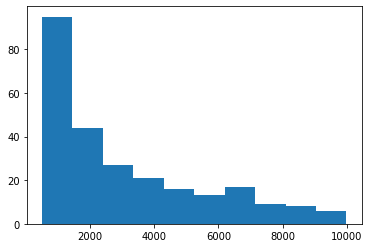

In [19]:
# plot two groups:
# Plot Hacking/ IT Incident Breaches

plt.hist(hacking_breach_individuals)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

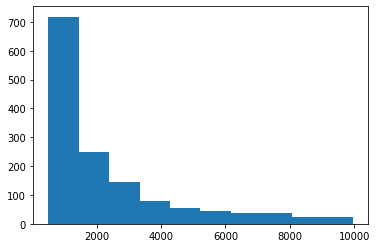

In [20]:
# plot histogram of all other breach types
plt.hist(other_breaches_individuals)
plt.show

Conclusion:

P- value = 0.0000001638223020546479, therefore we reject the null hypothesis there is a difference between the number of individuals affected by hacking/it breaches and other breach types.

# II. Categorical Variables

# Using Chi squared test, determine if there is a correlation between "Hacking/IT Incident" type breaches and "Covered Entity Type".

In [23]:
value = breaches.groupby(['Hacking/IT Incident', 'Covered Entity Type'])['Hacking/IT Incident'].value_counts()
value

Hacking/IT Incident  Covered Entity Type        Hacking/IT Incident
0.0                  Business Associate         0.0                     265
                     Health Plan                0.0                     222
                     Healthcare Clearing House  0.0                       4
                     Healthcare Provider        0.0                    1202
1.0                  Business Associate         1.0                      45
                     Health Plan                1.0                      47
                     Healthcare Provider        1.0                     297
Name: Hacking/IT Incident, dtype: int64

In [24]:
# convert series to df
value_2 = value.to_frame()
value_2

Hacking/IT Incident
Hacking/IT Incident Covered Entity Type       Hacking/IT Incident                     
0.0                 Business Associate        0.0                                  265
                    Health Plan               0.0                                  222
                    Healthcare Clearing House 0.0                                    4
                    Healthcare Provider       0.0                                 1202
1.0                 Business Associate        1.0                                   45
                    Health Plan               1.0                                   47
                    Healthcare Provider       1.0                                  297

In [25]:
# rename columns
value_2.columns = ['Breach']
value_2

Breach
Hacking/IT Incident Covered Entity Type       Hacking/IT Incident        
0.0                 Business Associate        0.0                     265
                    Health Plan               0.0                     222
                    Healthcare Clearing House 0.0                       4
                    Healthcare Provider       0.0                    1202
1.0                 Business Associate        1.0                      45
                    Health Plan               1.0                      47
                    Healthcare Provider       1.0                     297

In [26]:
# pivot dataframe
value_3 = pd.pivot_table(value_2, values='Breach', columns='Covered Entity Type', index='Hacking/IT Incident')
value_3

Covered Entity Type,Business Associate,Health Plan,Healthcare Clearing House,Healthcare Provider
Hacking/IT Incident,,,,
0.0,265.0,222.0,4.0,1202.0
1.0,45.0,47.0,NaN,297.0


In [27]:
# NaN value - fill in with zero, because in value_2 dataframe value is zero
# consider excluding healthcare clearing house because 0 value for hacking IT (small sample)
value_3.replace(np.nan, 0, inplace=True)
value_3

Covered Entity Type,Business Associate,Health Plan,Healthcare Clearing House,Healthcare Provider
Hacking/IT Incident,,,,
0.0,265.0,222.0,4.0,1202.0
1.0,45.0,47.0,0.0,297.0


In [28]:
# chi squared test
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(value_3)
print(stat, p, dof, expected)

5.98160507888298 0.1125086157641648 3 [[2.52079731e+02 2.18740154e+02 3.25264169e+00 1.21892747e+03]
 [5.79202690e+01 5.02598463e+01 7.47358309e-01 2.80072526e+02]]


Conclusion: p (0.11) > 0.05, therefore we fail to reject the null hypothesis 

Null: No difference between Hacking/IT Incident breach types and other breach types across entity types.

Alternative: There is a difference between Hacking/IT Incident breach types and other breach types across entity types.

# Using a Chi squared test, determine if there is a relationship between "Individuals affected" and "Hacking/ IT Incident" type breaches vs. other breach types and "Covered Entity Type". 

In [29]:
# groupby 

breaches[['Covered Entity Type', 'Individuals Affected', 'Hacking/IT Incident']].groupby(['Hacking/IT Incident', 'Covered Entity Type']).sum()

Individuals Affected
Hacking/IT Incident Covered Entity Type                            
0.0                 Business Associate                   15914279.0
                    Health Plan                           6507090.0
                    Healthcare Clearing House               17754.0
                    Healthcare Provider                  16481569.0
1.0                 Business Associate                    7214910.0
                    Health Plan                          82318249.0
                    Healthcare Provider                  13927795.0

In [31]:
# pivot df
pivot_test = breaches[['Covered Entity Type', 'Individuals Affected', 'Hacking/IT Incident']].groupby(['Hacking/IT Incident', 'Covered Entity Type']).sum()
pd.pivot_table(pivot_test, values='Individuals Affected', columns='Covered Entity Type', index='Hacking/IT Incident', aggfunc = np.sum)

Covered Entity Type,Business Associate,Health Plan,Healthcare Clearing House,Healthcare Provider
Hacking/IT Incident,,,,
0.0,15914279.0,6507090.0,17754.0,16481569.0
1.0,7214910.0,82318249.0,NaN,13927795.0


In [32]:
table_1 = pd.pivot_table(pivot_test, values='Individuals Affected', columns='Covered Entity Type', index='Hacking/IT Incident', aggfunc = np.sum)
table_1

Covered Entity Type,Business Associate,Health Plan,Healthcare Clearing House,Healthcare Provider
Hacking/IT Incident,,,,
0.0,15914279.0,6507090.0,17754.0,16481569.0
1.0,7214910.0,82318249.0,NaN,13927795.0


In [33]:
# examine NaN
breaches[breaches['Covered Entity Type'] == 'Healthcare Clearing House']

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description,Hacking/IT Incident,Other,Unauthorized Access/Disclosure,Theft,Improper Disposal,Loss,Unknown,Name of Covered Entity clean
1251,"Reimbursement Technologies, Inc.",PA,Healthcare Clearing House,2300.0,2013-10-31,Unauthorized Access/Disclosure,Network Server,No,"An employee of the covered entity (CE), Reimbu...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,Reimbursement Technologies
1295,"NHC HealthCare, Mauldin",SC,Healthcare Clearing House,4204.0,2013-09-13,Improper Disposal,Other,No,\N,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NHC HealthCare Mauldin
1487,"Advanced Data Processing, Inc.",FL,Healthcare Clearing House,10000.0,2012-11-29,Theft,Desktop Computer,No,"On or around June 15, 2012, an employee of the...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,Advanced Data Processing
1860,Franciscan Medical Group,WA,Healthcare Clearing House,1250.0,2011-01-13,Theft,Desktop Computer,No,\N,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Franciscan Medical Group


In [34]:
# fill NaN with zero
table_1.replace(np.nan, 0, inplace=True)

In [35]:
table_1

Covered Entity Type,Business Associate,Health Plan,Healthcare Clearing House,Healthcare Provider
Hacking/IT Incident,,,,
0.0,15914279.0,6507090.0,17754.0,16481569.0
1.0,7214910.0,82318249.0,0.0,13927795.0


In [36]:
# chi squared test
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(table_1)

In [37]:
print(stat, p, dof, expected)

49025961.60391973 0.0 3 [[6.32247250e+06 2.42808238e+07 4.85313933e+03 8.31254255e+06]
 [1.68067165e+07 6.45445152e+07 1.29008607e+04 2.20968215e+07]]


Conclusion is:  p-value is zero < 0.05 therefore reject null

Null hypothesis: There is no difference between breach type (Hacking/IT Incident vs. other) and entity type over individuals affected.

Alternative hypothesis: There is a difference between breach type (Hacking/IT Incident vs. other) and entity type over individuals affected.

# Email and network server 

In [44]:
# Make a list of unique type of breach values
type_of_breaches = ['Desktop Computer', 
                    'Electronic Medical Record', 
                    'Email',
                    'Laptop', 
                    'Network Server', 
                    'Other',
                    'Other Portable Electronic Device',
                    'Paper/Films',
                   ]

# Create new columns for these values in the dataframe
# Using...
for value in type_of_breaches:
      breaches[value] = np.where(breaches['Location of Breached Information'].str.contains(value), 1, 0)

In [45]:
breaches

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description,Hacking/IT Incident,...,Loss,Unknown,Name of Covered Entity clean,Desktop Computer,Electronic Medical Record,Email,Laptop,Network Server,Other Portable Electronic Device,Paper/Films
0,Delta Dental of Illinois,IL,Business Associate,4216.0,2019-04-17,Hacking/IT Incident,Email,Yes,Breach #19-340335 will be consolidated into Br...,1.0,...,0.0,0.0,Delta Dental of Illinois,0,0,1,0,0,0,0
1,Providence Health Plan,OR,Health Plan,651.0,2019-03-19,Theft,Laptop,Yes,An unencrypted laptop computer containing the ...,0.0,...,0.0,0.0,Providence Health Plan,0,0,0,1,0,0,0
2,ZOLL Services LLC,PA,Healthcare Provider,277319.0,2019-03-18,Hacking/IT Incident,Network Server,Yes,"Sonian, a subcontractor of the covered entity’...",1.0,...,0.0,0.0,ZOLL Services,0,0,0,0,1,0,0
3,Pasquotank-Camden Emergency Medical Service,NC,Healthcare Provider,20420.0,2019-02-28,Hacking/IT Incident,Network Server,No,"On December 14, 2018, Pasquotank-Camden Emerge...",1.0,...,0.0,0.0,PasquotankCamden Emergency Medical Service,0,0,0,0,1,0,0
4,AltaMed Health Services Corporation,CA,Healthcare Provider,6000.0,2019-02-15,Hacking/IT Incident,Network Server,Yes,"On December 31, 2018, ShareCare Health Data Se...",1.0,...,0.0,0.0,AltaMed Health Services Corporation,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079,"Mark D. Lurie, MD",CA,Healthcare Provider,5166.0,2009-11-20,Theft,Desktop Computer,No,A shared Computer that was used for backup was...,0.0,...,0.0,0.0,Mark D Lurie MD,1,0,0,0,0,0,0
2080,Health Services for Children with Special Need...,DC,Health Plan,3800.0,2009-11-17,Loss,Laptop,No,A laptop was lost by an employee while in tran...,0.0,...,1.0,0.0,Health Services for Children with Special Needs,0,0,0,1,0,0,0
2081,Alaska Department of Health and Social Services,AK,Healthcare Provider,501.0,2009-10-30,Theft,"Other, Other Portable Electronic Device",No,The Alaska Department of Health and Social Ser...,0.0,...,0.0,0.0,Alaska Department of Health Social Services,0,0,0,0,0,1,0
2082,"Mid America Kidney Stone Association, LLC",MO,Healthcare Provider,1000.0,2009-10-28,Theft,Network Server,No,Five desktop computers containing unencrypted ...,0.0,...,0.0,0.0,Mid America Kidney Stone Association,0,0,0,0,1,0,0


In [50]:
location_table = breaches.groupby(['Hacking/IT Incident'])[['Network Server', 'Email']].sum()
location_table

,Network Server,Email
Hacking/IT Incident,,
0.0,133,170
1.0,254,95


In [51]:
# Chi squared test

from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(location_table)

In [52]:
print(stat, p, dof, expected)

54.90133166533202 1.2673510892369518e-13 1 [[179.84815951 123.15184049]
 [207.15184049 141.84815951]]


Null hypothesis: There is no relationship between breach type and location of breach. 

Alternative Hypothesis: There is a relationship between breach type and location of breach. 

Conclusion: P value is < 0.05, Reject null 